### Student Dropout Prediction System
### **Machine Learning Project 2**  

We're building a system to predict which students are at risk of dropping out, so we can provide them with early support and help them succeed in their studies.

#### Step 1: Importing Tools and Loading Data
Let's start by importing all the libraries we'll need and loading our student data.

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For beautiful visualizations
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.linear_model import LogisticRegression  # Probabilistic model
from sklearn.tree import DecisionTreeClassifier  # Tree-based model
from sklearn.neighbors import KNeighborsClassifier  # Distance-based model
from sklearn.ensemble import RandomForestClassifier  # Ensemble method
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation
import pickle  # For saving our best model
import warnings  # To ignore warning messages
warnings.filterwarnings('ignore')  # Hide warnings for cleaner output

print("All tools loaded successfully!")

All tools loaded successfully!


### Load the student dataset

In [4]:
print("Loading student data...")
data = pd.read_csv('data.csv', delimiter=';')  # Read CSV file with semicolon separator
print(f"Dataset loaded: {data.shape[0]} students with {data.shape[1]} features each")
print("\nFirst look at our data:")
data.head()  # Display first 5 rows to understand the data structure

Loading student data...
Dataset loaded: 4424 students with 37 features each

First look at our data:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Step 2: Data Preprocessing and Cleaning
We need to prepare our data for machine learning by handling missing values and understanding our features.

In [6]:
# Check basic information about the dataset
print("🔍 Dataset Information:")
print(f"Shape: {data.shape}")  # (number of students, number of features)
print(f"\nColumn names: {list(data.columns)}")  # Show all feature names
print(f"\nTarget variable distribution:")  # Our prediction goal
print(data['Target'].value_counts())  # Count how many students in each category

🔍 Dataset Information:
Shape: (4424, 37)

Column names: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [8]:
# Check for missing values
print("Checking for missing data...")
missing_data = data.isnull().sum()  # Count missing values in each column
print("Missing values in each column:")
print(missing_data[missing_data > 0])  # Only show columns with missing values

if missing_data.sum() == 0:
    print("No missing values found! Our data is clean.")
else:
    print(f"Found {missing_data.sum()} missing values that need handling.")

Checking for missing data...
Missing values in each column:
Series([], dtype: int64)
No missing values found! Our data is clean.


In [9]:
# Let's understand our target variable better
print("Understanding our prediction target:")
target_counts = data['Target'].value_counts()
print(target_counts)

Understanding our prediction target:
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


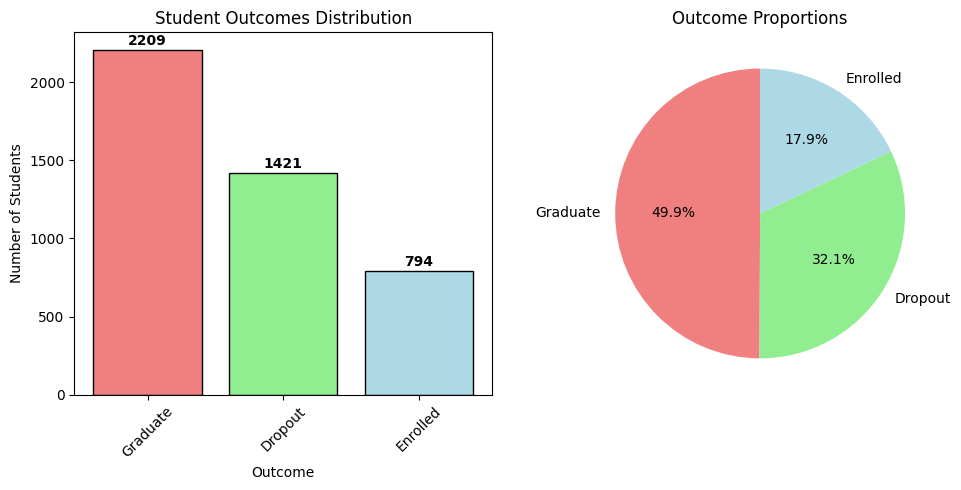

In [14]:
# Create a visualization of the target distribution
plt.figure(figsize=(10, 5))
# Plot 1: Bar chart
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightgreen', 'lightblue']
plt.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black')
plt.title('Student Outcomes Distribution')
plt.xlabel('Outcome')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
# Add numbers on bars
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')
# Plot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Outcome Proportions')

plt.tight_layout()
plt.show()

### Step 3: Data Analysis and Exploration
Let's explore the data to understand patterns and relationships between features.

In [18]:
# Get basic statistics for numerical features
print("Basic statistics of numerical features:")
print(data.describe())  # Show count, mean, std, min, max for each numerical column

Basic statistics of numerical features:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000

Analyzing key features:


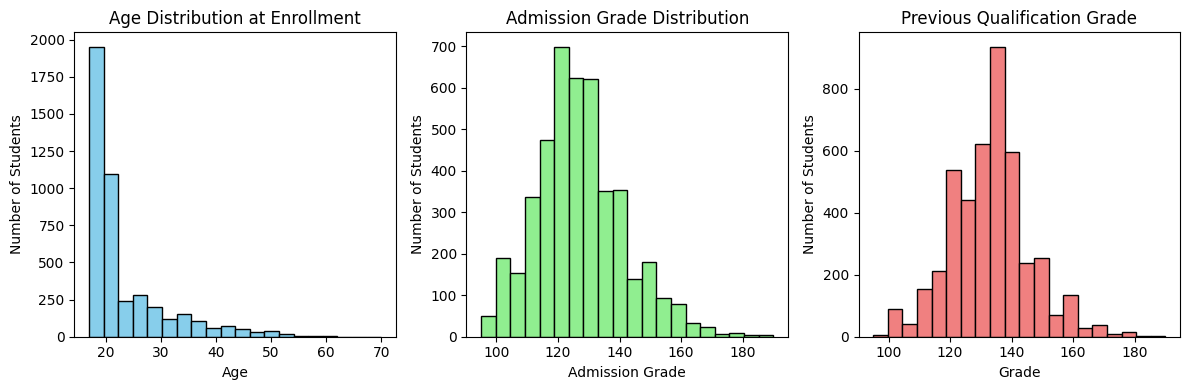

In [20]:
# Let's look at some important features individually
print("Analyzing key features:")

# Feature 1: Age at enrollment
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['Age at enrollment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution at Enrollment')
plt.xlabel('Age')
plt.ylabel('Number of Students')

# Feature 2: Admission grade
plt.subplot(1, 3, 2)
plt.hist(data['Admission grade'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Admission Grade Distribution')
plt.xlabel('Admission Grade')
plt.ylabel('Number of Students')

# Feature 3: Previous qualification grade
plt.subplot(1, 3, 3)
plt.hist(data['Previous qualification (grade)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Previous Qualification Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()

### Step 4: Correlation Analysis
Let's examine how different features relate to each other and to our target variable.

In [24]:
# Prepare data for correlation analysis
# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=[np.number]).columns
# Create correlation matrix
correlation_matrix = data[numerical_columns].corr()
print(f"Selected {len(numerical_columns)} numerical features for correlation analysis")

Selected 36 numerical features for correlation analysis


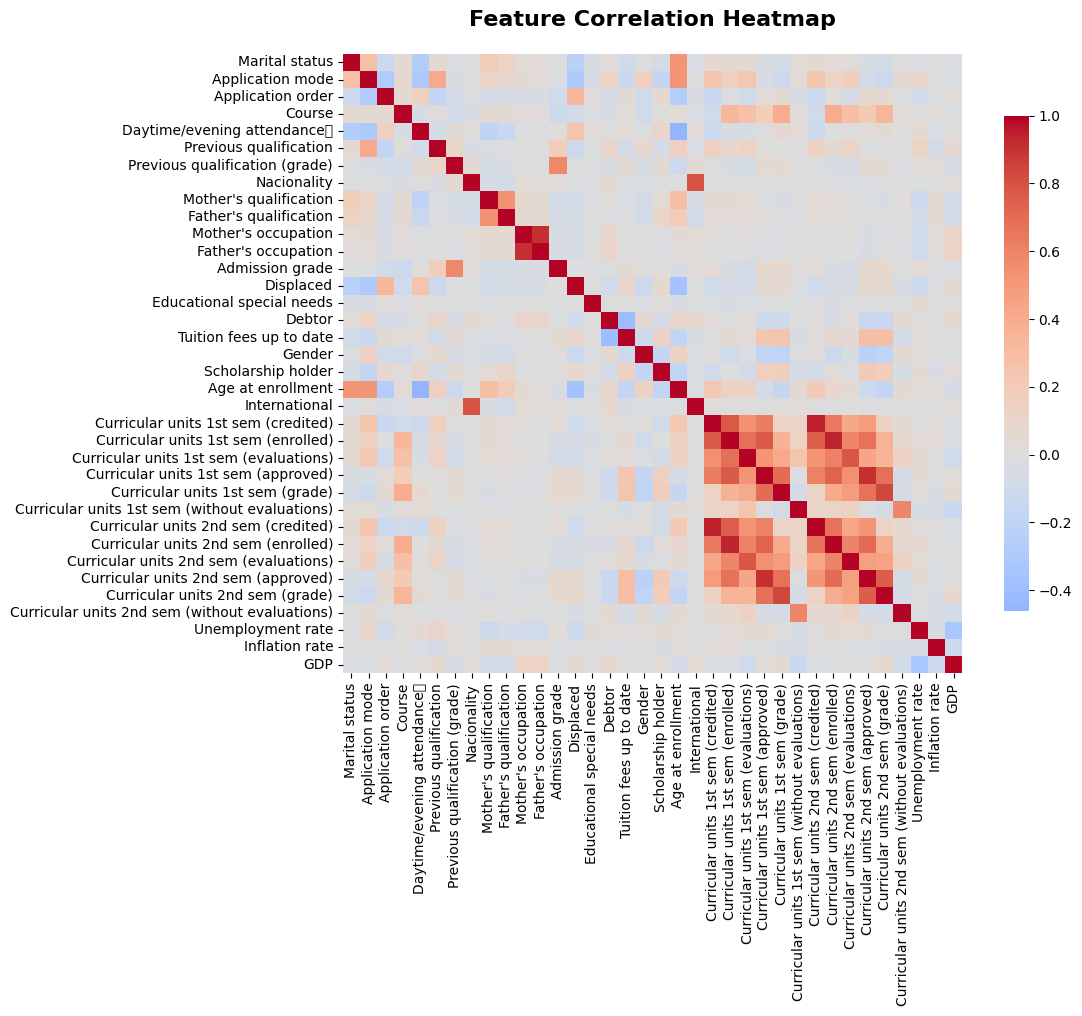

In [23]:
# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
# Create correlation heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',  # Blue to red color scheme
            center=0,  # Center at 0 (no correlation)
            square=True,  # Square cells
            cbar_kws={'shrink': 0.8})  # Color bar size

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [26]:
# Let's examine correlations with our target variable
print("Correlations with Target variable:")
# We need to convert target to numerical for correlation
data_encoded = data.copy()
le = LabelEncoder()
data_encoded['Target_encoded'] = le.fit_transform(data['Target'])
# Get correlations with target
target_correlations = data_encoded[numerical_columns].corrwith(data_encoded['Target_encoded']).abs().sort_values(ascending=False)

print("Top 10 features most correlated with student outcome:")
print(target_correlations.head(10))

Correlations with Target variable:
Top 10 features most correlated with student outcome:
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Age at enrollment                      0.243438
Debtor                                 0.240999
Gender                                 0.229270
Application mode                       0.221747
dtype: float64


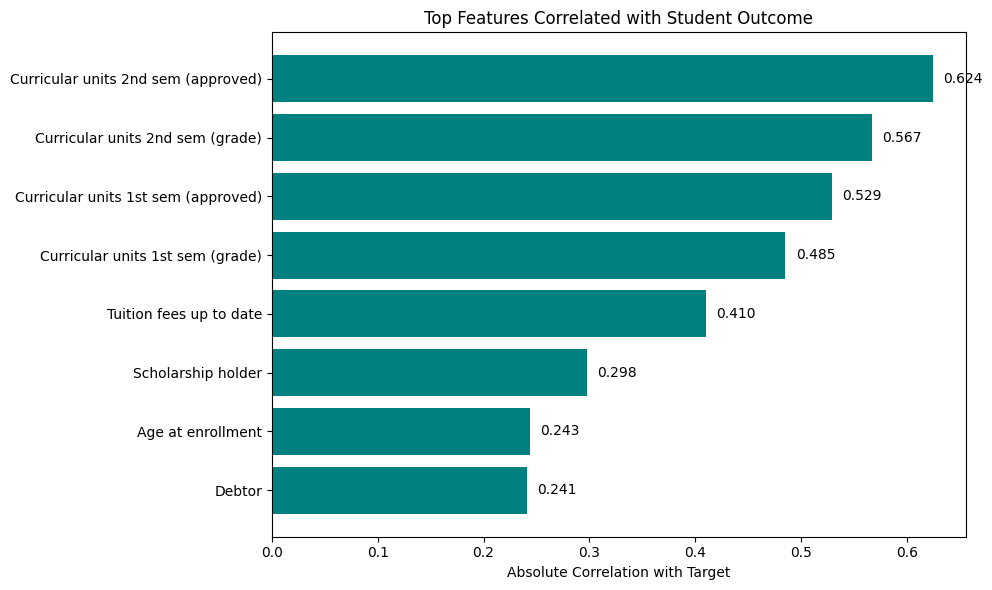

In [27]:
# Let's visualize the most important correlations
plt.figure(figsize=(10, 6))
# Get top 8 correlated features
top_features = target_correlations.head(8).index
# Create bar plot
plt.barh(range(len(top_features)), target_correlations[top_features], color='teal')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Absolute Correlation with Target')
plt.title('Top Features Correlated with Student Outcome')
plt.gca().invert_yaxis()  # Highest correlation at top
# Add correlation values on bars
for i, value in enumerate(target_correlations[top_features]):
    plt.text(value + 0.01, i, f'{value:.3f}', va='center')
plt.tight_layout()
plt.show()

### Step 5: Data Preparation for Machine Learning
We need to prepare our data by encoding categorical variables and splitting into training/test sets.

In [28]:
# Separate features (X) and target (y)
X = data.drop('Target', axis=1)  # All columns except Target
y = data['Target']  # Only the Target column

In [29]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (4424, 36)
Target shape: (4424,)


In [31]:
# Handle categorical variables (if any)
# Identify categorical columns (non-numeric)
categorical_columns = X.select_dtypes(include=['object']).columns

In [32]:
if len(categorical_columns) > 0:
    print(f"Found categorical columns: {list(categorical_columns)}")
    # Use one-hot encoding for categorical variables
    X = pd.get_dummies(X, columns=categorical_columns)
else:
    print("No categorical columns found - all features are numerical")

print(f"Features shape after encoding: {X.shape}")

No categorical columns found - all features are numerical
Features shape after encoding: (4424, 36)


In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducible results
    stratify=y  # Maintain same proportion of classes in both sets
)

In [34]:
print(f"Training set: {X_train.shape[0]} students")
print(f"Testing set: {X_test.shape[0]} students")
print(f"Feature count: {X_train.shape[1]}")

Training set: 3539 students
Testing set: 885 students
Feature count: 36


In [35]:
# Scale the features (important for distance-based algorithms)
scaler = StandardScaler()  # Create scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using training parameters

### Step 6: Training Multiple Machine Learning Models
We'll train four different types of models as required.

In [36]:
# Initialize our four models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),  # Probabilistic model
    'Decision Tree': DecisionTreeClassifier(random_state=42),    # Tree-based model  
    'K-Nearest Neighbors': KNeighborsClassifier(),               # Distance-based model
    'Random Forest': RandomForestClassifier(random_state=42)     # Ensemble method
}

In [37]:
# Dictionary to store model results
results = {}

In [40]:
# Train and evaluate each model
print("🎯Training and evaluating models...")

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Choose scaled or unscaled data based on model type
    if name == 'K-Nearest Neighbors':
        # KNN needs scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Other models can use unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} trained with accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

🎯Training and evaluating models...

--- Training Logistic Regression ---
Logistic Regression trained with accuracy: 0.6836 (68.36%)

--- Training Decision Tree ---
Decision Tree trained with accuracy: 0.6972 (69.72%)

--- Training K-Nearest Neighbors ---
K-Nearest Neighbors trained with accuracy: 0.6678 (66.78%)

--- Training Random Forest ---
Random Forest trained with accuracy: 0.7672 (76.72%)


### Step 7: Model Evaluation with Cross-Validation
Let's use k-fold cross-validation for more reliable performance estimates.

In [41]:
print("Performing k-fold cross-validation...")

# Perform 5-fold cross-validation for each model
cv_results = {}

for name, model in models.items():
    print(f"\n--- Cross-validating {name} ---")
    
    # Choose scaled or unscaled data
    if name == 'K-Nearest Neighbors':
        X_cv = X_train_scaled
    else:
        X_cv = X_train
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_cv, y_train, cv=5, scoring='accuracy')
    
    cv_results[name] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std(),
        'all_scores': cv_scores
    }
    
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Performing k-fold cross-validation...

--- Cross-validating Logistic Regression ---
Mean accuracy: 0.6779 (±0.0144)

--- Cross-validating Decision Tree ---
Mean accuracy: 0.6784 (±0.0171)

--- Cross-validating K-Nearest Neighbors ---
Mean accuracy: 0.6858 (±0.0143)

--- Cross-validating Random Forest ---
Mean accuracy: 0.7782 (±0.0124)


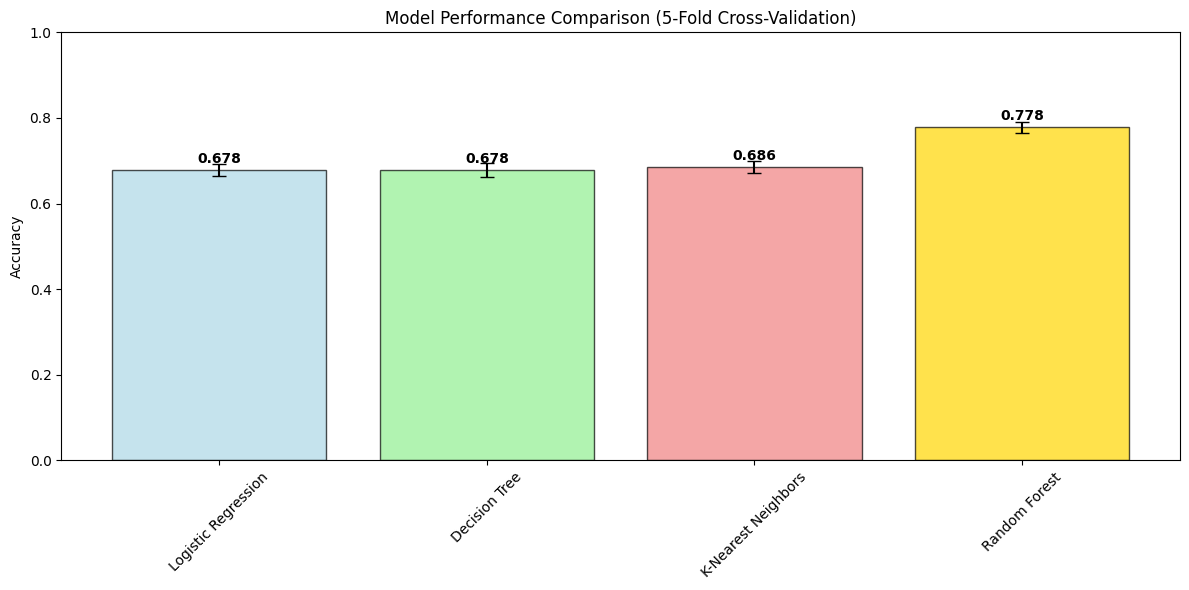

In [42]:
# Visualize cross-validation results
plt.figure(figsize=(12, 6))

# Extract results for plotting
model_names = list(cv_results.keys())
mean_accuracies = [cv_results[name]['mean_accuracy'] for name in model_names]
std_accuracies = [cv_results[name]['std_accuracy'] for name in model_names]

# Create bar plot with error bars
bars = plt.bar(model_names, mean_accuracies, yerr=std_accuracies, 
               capsize=5, color=['lightblue', 'lightgreen', 'lightcoral', 'gold'],
               edgecolor='black', alpha=0.7)

plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (5-Fold Cross-Validation)')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

# Add value labels on bars
for bar, accuracy in zip(bars, mean_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 8: Detailed Model Analysis
Let's examine confusion matrices and understand model performance in detail.

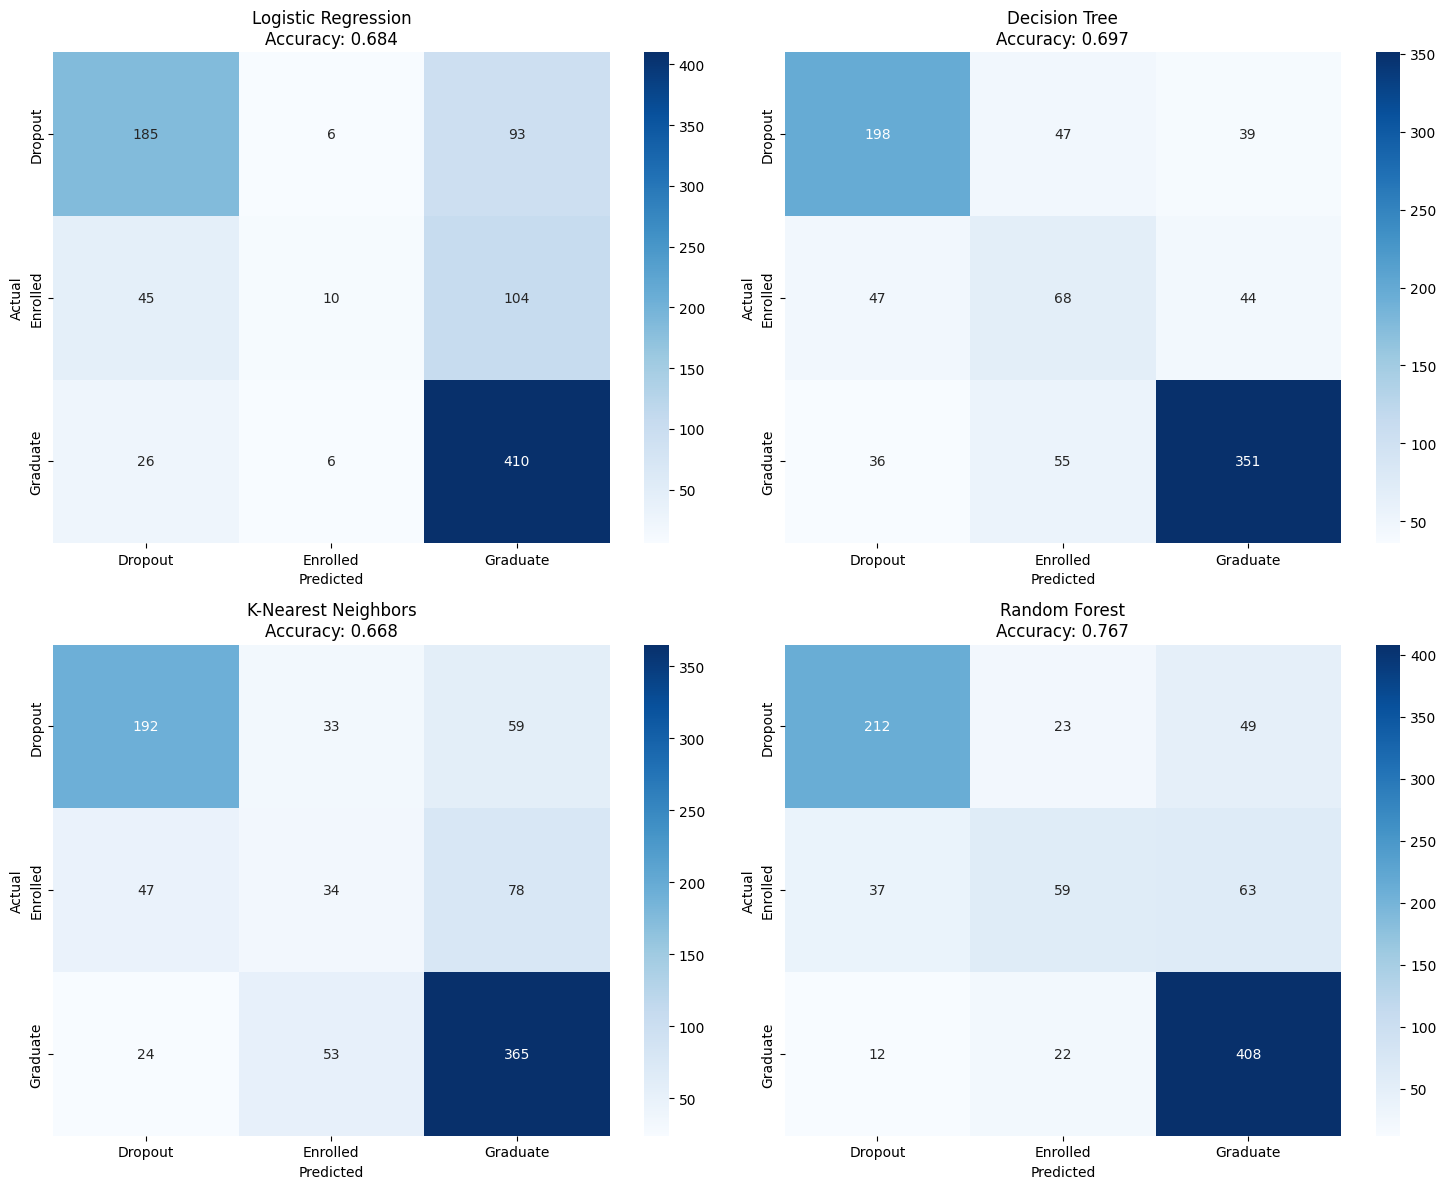

In [44]:
# Create confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()  # Flatten the 2x2 array of axes

for idx, (name, result) in enumerate(results.items()):
    # Create confusion matrix
    cm = confusion_matrix(y_test, result['predictions'])
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=le.classes_, yticklabels=le.classes_)
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [45]:
# Print detailed performance summary
print("PERFORMANCE SUMMARY:")
print("="*50)

for name in models.keys():
    cv_mean = cv_results[name]['mean_accuracy']
    cv_std = cv_results[name]['std_accuracy']
    test_accuracy = results[name]['accuracy']
    print(f"\n{name}:")
    print(f"  Cross-validation: {cv_mean:.4f} (±{cv_std:.4f})")
    print(f"  Test set accuracy: {test_accuracy:.4f}")

PERFORMANCE SUMMARY:

Logistic Regression:
  Cross-validation: 0.6779 (±0.0144)
  Test set accuracy: 0.6836

Decision Tree:
  Cross-validation: 0.6784 (±0.0171)
  Test set accuracy: 0.6972

K-Nearest Neighbors:
  Cross-validation: 0.6858 (±0.0143)
  Test set accuracy: 0.6678

Random Forest:
  Cross-validation: 0.7782 (±0.0124)
  Test set accuracy: 0.7672


### Step 9: Feature Importance Analysis
Let's find out which features are most important for predicting student success.

In [46]:
# Use Random Forest to get feature importance (it provides this naturally)
best_model = models['Random Forest']  # Let's use Random Forest for feature importance
best_model.fit(X_train, y_train)  # Make sure it's trained

RandomForestClassifier(random_state=42)

In [47]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)
print("Top 10 most important features for predicting student outcomes:")
print(feature_importance.head(10))

Top 10 most important features for predicting student outcomes:
                                   feature  importance
30     Curricular units 2nd sem (approved)    0.142283
31        Curricular units 2nd sem (grade)    0.109008
24     Curricular units 1st sem (approved)    0.091937
25        Curricular units 1st sem (grade)    0.059588
12                         Admission grade    0.043575
19                       Age at enrollment    0.040287
16                 Tuition fees up to date    0.038903
29  Curricular units 2nd sem (evaluations)    0.038200
23  Curricular units 1st sem (evaluations)    0.037504
6           Previous qualification (grade)    0.037498


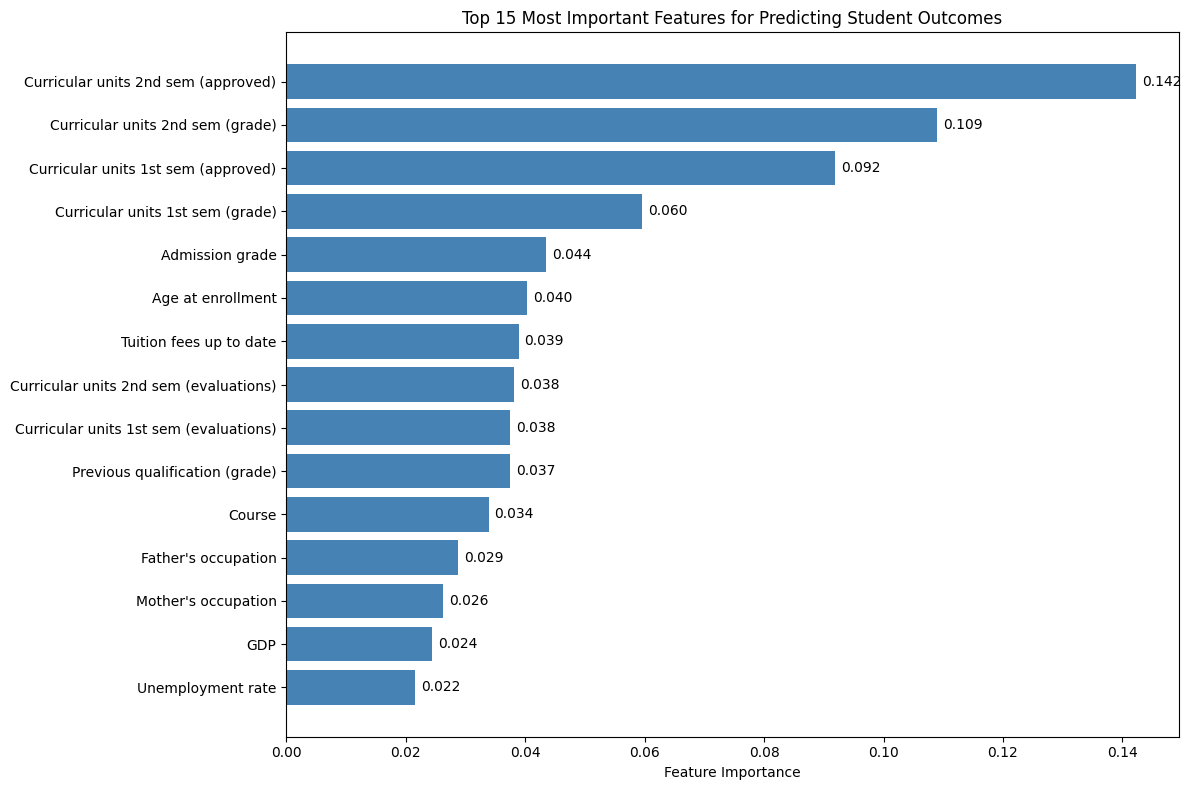

In [48]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
# Plot top 15 features
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Predicting Student Outcomes')
plt.gca().invert_yaxis()  # Most important at top
# Add importance values on bars
for i, importance in enumerate(top_features['importance']):
    plt.text(importance + 0.001, i, f'{importance:.3f}', va='center')

plt.tight_layout()
plt.show()

### Step 10: Selecting and Saving the Best Model
Based on our analysis, we'll select the best model and save it for future use.

In [49]:
# Find model with highest cross-validation accuracy
best_model_name = max(cv_results, key=lambda x: cv_results[x]['mean_accuracy'])
best_model = models[best_model_name]
best_accuracy = cv_results[best_model_name]['mean_accuracy']

In [50]:
print(f"Best model: {best_model_name}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")

Best model: Random Forest
Best cross-validation accuracy: 0.7782


In [54]:
# Retrain best model on full training data
print(f"\nRetraining {best_model_name} on full training data...")
if best_model_name == 'K-Nearest Neighbors':
    best_model.fit(X_train_scaled, y_train)
else:
    best_model.fit(X_train, y_train)
# Final evaluation on test set
if best_model_name == 'K-Nearest Neighbors':
    final_predictions = best_model.predict(X_test_scaled)
else:
    final_predictions = best_model.predict(X_test)
    
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final test accuracy: {final_accuracy:.4f}")


Retraining Random Forest on full training data...
Final test accuracy: 0.7672


In [55]:
# Save the best model as a pickle file
print("\nSaving the best model...")
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")


Saving the best model...
Best model saved as 'best_model.pkl'


In [57]:
# Also save the scaler for using KNN
if best_model_name == 'K-Nearest Neighbors':
    with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)
    print("Scaler saved as 'scaler.pkl'")

### Step 11: Final Results and Discussion

In [61]:
print("FINAL PROJECT SUMMARY")
print("="*60)
print(f"Dataset Statistics:")
print(f"   Total students: {data.shape[0]}")
print(f"   Number of features: {data.shape[1]}")
print(f"   Target classes: {list(data['Target'].unique())}")

FINAL PROJECT SUMMARY
Dataset Statistics:
   Total students: 4424
   Number of features: 37
   Target classes: ['Dropout', 'Graduate', 'Enrolled']


In [63]:
print(f"Model Performance Ranking:")
sorted_models = sorted(cv_results.items(), key=lambda x: x[1]['mean_accuracy'], reverse=True)
for i, (name, result) in enumerate(sorted_models, 1):
    print(f"   {i}. {name}: {result['mean_accuracy']:.4f} (±{result['std_accuracy']:.4f})")

Model Performance Ranking:
   1. Random Forest: 0.7782 (±0.0124)
   2. K-Nearest Neighbors: 0.6858 (±0.0143)
   3. Decision Tree: 0.6784 (±0.0171)
   4. Logistic Regression: 0.6779 (±0.0144)


In [64]:
print(f"Selected Best Model: {best_model_name}")
print(f"   Cross-validation accuracy: {best_accuracy:.4f}")
print(f"   Test set accuracy: {final_accuracy:.4f}")

Selected Best Model: Random Forest
   Cross-validation accuracy: 0.7782
   Test set accuracy: 0.7672


In [65]:
print(f"\nKey Insights:")
print(f"   Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"   Best performing model type: {type(best_model).__name__}")
print(f"   Dataset balance: {dict(target_counts)}")


Key Insights:
   Most important feature: Curricular units 2nd sem (approved)
   Best performing model type: RandomForestClassifier
   Dataset balance: {'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794}


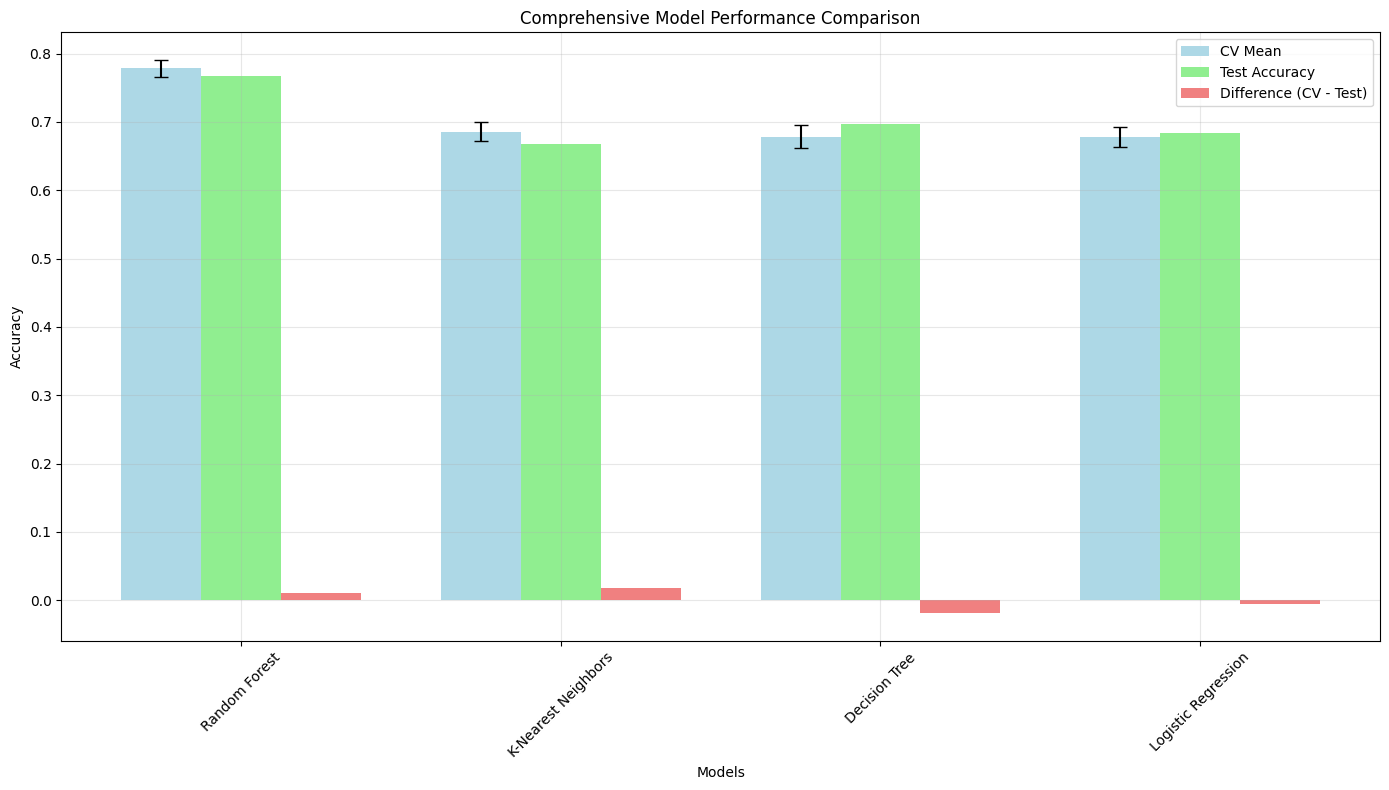

In [66]:
# Final visualization comparing all models
plt.figure(figsize=(14, 8))
# Create comprehensive comparison
model_comparison = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV_Mean': [cv_results[name]['mean_accuracy'] for name in cv_results.keys()],
    'CV_Std': [cv_results[name]['std_accuracy'] for name in cv_results.keys()],
    'Test_Accuracy': [results[name]['accuracy'] for name in cv_results.keys()]
})

# Sort by CV mean
model_comparison = model_comparison.sort_values('CV_Mean', ascending=False)

# Create plot
x_pos = np.arange(len(model_comparison))
width = 0.25

plt.bar(x_pos - width, model_comparison['CV_Mean'], width, 
        label='CV Mean', yerr=model_comparison['CV_Std'], capsize=5, color='lightblue')
plt.bar(x_pos, model_comparison['Test_Accuracy'], width, 
        label='Test Accuracy', color='lightgreen')
plt.bar(x_pos + width, model_comparison['CV_Mean'] - model_comparison['Test_Accuracy'], width,
        label='Difference (CV - Test)', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comprehensive Model Performance Comparison')
plt.xticks(x_pos, model_comparison['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Our dropout prediction system can help identify at-risk students early, allowing institutions to provide targeted support and improve student success rates. 